In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
# Directory with our training sanyam pictures
sanyam_dir = os.path.join('/content/drive/My Drive/Identify/sanyam')

# Directory with our training uttam pictures
uttam_dir = os.path.join('/content/drive/My Drive/Identify/uttam')

In [3]:
sanyam_names = os.listdir(sanyam_dir)
print(sanyam_names[:10])

uttam_names = os.listdir(uttam_dir)
print(uttam_names[:10])

['WIN_20190617_01_22_08_Pro.jpg', 'WIN_20190617_01_22_10_Pro.jpg', 'WIN_20190929_03_40_07_Pro.jpg', 'WIN_20190929_03_40_09_Pro.jpg', 'WIN_20190930_00_42_01_Pro.jpg', 'WIN_20190929_03_40_03_Pro.jpg', 'WIN_20190930_00_43_03_Pro.jpg', 'WIN_20190930_00_43_05_Pro.jpg', 'WIN_20190930_00_43_01_Pro.jpg', 'WIN_20191220_01_42_41_Pro.jpg']
['IMG_20200114_125859.jpg', 'IMG_20200114_125855.jpg', 'IMG_20200114_125850.jpg', 'IMG_20200114_125848.jpg', 'IMG_20200114_125845.jpg', 'IMG_20200114_125843.jpg', 'IMG_20200114_125836.jpg', 'IMG_20200114_125835.jpg', 'IMG_20200114_125834.jpg', 'IMG_20200114_125832.jpg']


In [4]:

print('total training Sanyam images:', len(os.listdir(sanyam_dir)))
print('total training Uttam images:', len(os.listdir(uttam_dir)))

total training Sanyam images: 126
total training Uttam images: 39


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

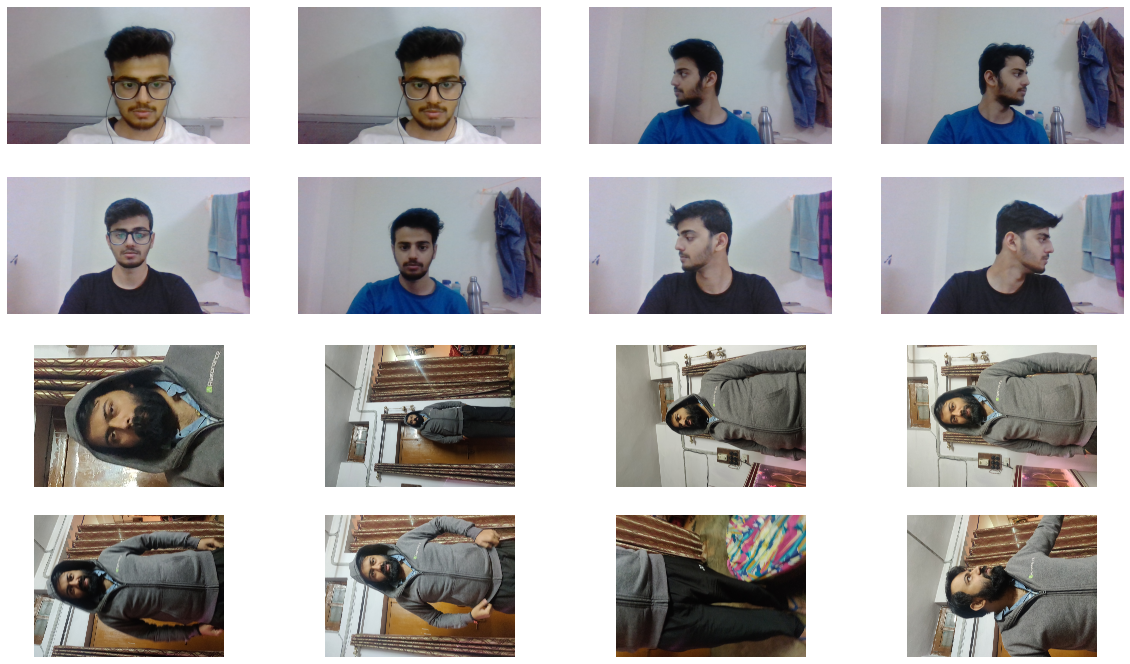

In [6]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 5, nrows * 3)

pic_index += 8
next_sanyam_pix = [os.path.join(sanyam_dir, fname) 
                for fname in sanyam_names[pic_index-8:pic_index]]
next_uttam_pix = [os.path.join(uttam_dir, fname) 
                for fname in uttam_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_sanyam_pix+next_uttam_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [0]:
import tensorflow as tf
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 16)      2320      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 145, 145, 16)      2320      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 143, 143, 16)      2320      
_________________________________________________________________
batch_normalization (BatchNo (None, 143, 143, 16)      64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 71, 71, 16)        0

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/Identify/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')




Found 165 images belonging to 2 classes.


In [13]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,  
      epochs=10,
      verbose=1,
      
     )


Epoch 1/10
10/10 [==============================] - 151s 15s/step - loss: 2.2430 - acc: 0.7539
Epoch 2/10
10/10 [==============================] - 96s 10s/step - loss: 0.2653 - acc: 0.9176
Epoch 3/10
10/10 [==============================] - 94s 9s/step - loss: 0.2167 - acc: 0.9188
Epoch 4/10
10/10 [==============================] - 95s 9s/step - loss: 0.0415 - acc: 0.9855
Epoch 5/10
10/10 [==============================] - 95s 10s/step - loss: 0.0230 - acc: 0.9939
Epoch 6/10
10/10 [==============================] - 95s 9s/step - loss: 0.1388 - acc: 0.9588
Epoch 7/10
10/10 [==============================] - 93s 9s/step - loss: 0.1445 - acc: 0.9527
Epoch 8/10
10/10 [==============================] - 95s 9s/step - loss: 0.0135 - acc: 0.9976
Epoch 9/10
10/10 [==============================] - 92s 9s/step - loss: 0.0016 - acc: 1.0000
Epoch 10/10
10/10 [==============================] - 94s 9s/step - loss: 4.4271e-04 - acc: 1.0000


Saving 51438545.jpeg to 51438545 (5).jpeg
[1.]
AxesImage(54,36;334.8x217.44)
 Sanyam


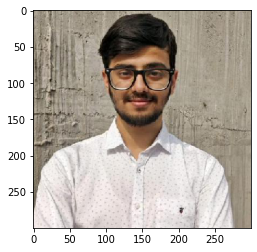

In [23]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  print(plt.imshow(img))
  if classes[0]<0.5:
    print(" Uttam")
  else:
    print(" Sanyam")
  
 